In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [106]:
# Dias de permanência por hospital

df_Hosp = pd.read_excel(r'C:\Users\DuduCuco\Documents\NewDoencasRespiratorias\DoencasRespiratorias\Data\DiasPermEstabSaude.xlsx')
#df_Hosp.set_index('Mês/ano de competência', inplace=True)
df_Hosp = df_Hosp.iloc[:, :-1]
df_Hosp.head()
#df_Hosp.columns

,Mês/ano de competência,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,...,2082624 HOSPITAL JAPONES SANTA CRUZ,2077507 HOSPITAL LEFORTE - LIBERDADE,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO
0,jan/08,10,0,0,0,0,114,0,347,0,...,0,44,3,0,0,4,0,363,20,508
1,fev/08,52,0,8,0,0,475,1546,269,83,...,0,76,557,0,1,7,0,756,7,1711
2,mar/08,31,0,20,0,0,627,2704,455,121,...,0,134,470,0,15,3,0,560,81,2053
3,abr/08,20,0,0,0,0,656,4181,502,192,...,0,44,642,0,20,7,0,577,46,1635
4,mai/08,112,0,20,0,0,236,2756,449,432,...,0,130,913,0,7,6,0,947,37,2316


In [107]:
df_Hosp['Mês/ano de competência'] = pd.to_datetime(df_Hosp['Mês/ano de competência'], format='%b/%y')

# Dividindo por ano/mes/dia
df_Hosp['Ano'] = df_Hosp['Mês/ano de competência'].dt.year
df_Hosp['Mês'] = df_Hosp['Mês/ano de competência'].dt.month

df_Hosp.drop('Mês/ano de competência',axis=1, inplace=True)

df_Hosp.head(1)

,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS,...,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO,Ano,Mês
0,10,0,0,0,0,114,0,347,0,146,...,3,0,0,4,0,363,20,508,2008,1


In [108]:
# Agrupando todas as colunas em uma, e separando as internações em outra coluna

df_Hosp_melted = df_Hosp.melt(id_vars=['Ano', 'Mês'], var_name='Hospital', value_name='Internações')

# Encontrar o maior valor de internação para cada hospital
max_internacoes_por_hospital = df_Hosp_melted.groupby('Hospital')['Internações'].max()

# Adicionar a coluna de lotação máxima ao DataFrame original

#df_Hosp_melted.dtypes

df_Hosp_melted['Lotação Máxima'] = df_Hosp_melted['Hospital'].map(max_internacoes_por_hospital)

df_Hosp_melted['Ocupação'] = (df_Hosp_melted['Internações'] / df_Hosp_melted['Lotação Máxima'])*100

df_Hosp_melted.head()

,Ano,Mês,Hospital,Internações,Lotação Máxima,Ocupação
0,2008,1,2077531 A C CAMARGO CANCER CENTER,10,413,2.421308
1,2008,2,2077531 A C CAMARGO CANCER CENTER,52,413,12.590799
2,2008,3,2077531 A C CAMARGO CANCER CENTER,31,413,7.506053
3,2008,4,2077531 A C CAMARGO CANCER CENTER,20,413,4.842615
4,2008,5,2077531 A C CAMARGO CANCER CENTER,112,413,27.118644


In [113]:
ocupacao = df_Hosp_melted[['Hospital', 'Lotação Máxima']]


media_internacoes_por_mes_por_hospital = df_Hosp_melted.groupby(['Hospital', 'Mês'])['Internações'].mean().reset_index()
media_internacoes_por_mes_por_hospital['Internações'] = media_internacoes_por_mes_por_hospital['Internações'].astype(int)
media_internacoes_por_mes_por_hospital = media_internacoes_por_mes_por_hospital.merge(ocupacao, on=['Hospital'])
media_internacoes_por_mes_por_hospital['taxa_ocupacao'] = (media_internacoes_por_mes_por_hospital['Internações'] / media_internacoes_por_mes_por_hospital['Lotação Máxima'])*100
media_internacoes_por_mes_por_hospital.head()

,Hospital,Mês,Internações,Lotação Máxima,taxa_ocupacao
0,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
1,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
2,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
3,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
4,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111


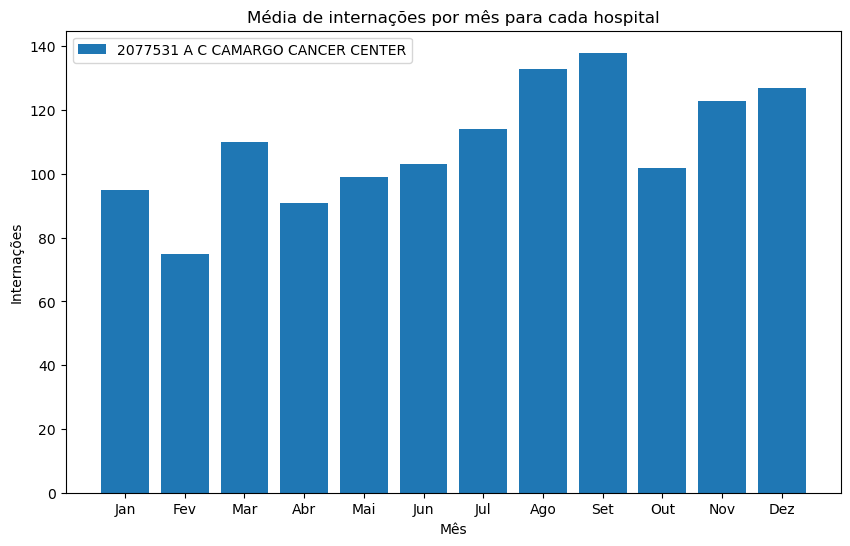

In [114]:
# Criar uma figura e eixos
plt.figure(figsize=(10, 6))

# Iterar sobre cada hospital
hospital = input('Nome do hospital')
# Filtrar os dados apenas para o hospital atual
data_hospital = media_internacoes_por_mes_por_hospital[media_internacoes_por_mes_por_hospital['Hospital'] == hospital]

# Plotar os dados de internações para cada mês para o hospital atual
plt.bar(data_hospital['Mês'], data_hospital['Internações'], label=hospital)

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.title('Média de internações por mês para cada hospital')
plt.legend()

# Definir os ticks do eixo x para mostrar os meses
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostrar o gráfico
#plt.grid(True)
plt.show()
